librerias necesarias

In [2]:
import pandas as pd

importar archivo "glassdoor.csv" a trabajar

In [3]:
df = pd.read_csv("glassdoor.csv")

Verificar información del DataFrame con .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165290 entries, 0 to 165289
Columns: 163 entries, benefits.benefitRatingDecimal to wwfu
dtypes: bool(11), float64(35), int64(23), object(94)
memory usage: 193.4+ MB


rango de filas: 165290
rango de columnas: 163 columnas
tipos de datos: 11 booleanos, 35 float, 23 enteros y 94 objetos

Inspección de nulos con .isna()

In [5]:
df.isna().sum()

benefits.benefitRatingDecimal            0
benefits.comments                        1
benefits.highlights                      1
benefits.numRatings                      0
benefits.employerSummary            159541
                                     ...  
salary.currency.positiveTemplate     88513
salary.currency.symbol               88513
salary.lastSalaryDate                88513
salary.salaries                      18141
wwfu                                146549
Length: 163, dtype: int64

verificamos los valores con .head()

In [6]:
df[["benefits.highlights"]].min()

benefits.highlights    1.0
dtype: float64

Aqui verificamos una fila para luego transponer y tener una mejor lectura

In [46]:
df

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,benefits.employerSummary,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.empName,gaTrackerData.empSize,...,salary.currency.displayName,salary.currency.id,salary.currency.name,salary.currency.negativeTemplate,salary.currency.new,salary.currency.positiveTemplate,salary.currency.symbol,salary.lastSalaryDate,salary.salaries,wwfu
0,0.000000,2801.0,2801.0,0,NaN,2801,-1,2183810,Modus Group,501-1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2483.0,NaN
1,4.000000,2802.0,2802.0,3,NaN,2802,-1,10416,Boehringer Ingelheim,10000--1,...,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$(#),False,$#,&pound;,2019-10-14T06:05:58,2484.0,NaN
2,0.000000,2803.0,2803.0,0,NaN,2803,-1,1043373,Immobiliare.it,201-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485.0,NaN
3,0.000000,2804.0,2804.0,0,NaN,2804,-1,2226886,Codup,1-50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2486.0,NaN
4,0.000000,2805.0,2805.0,0,NaN,2805,-1,851555,Markelytics Solutions,201-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2487.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165285,0.000000,58396.0,58396.0,0,NaN,58396,-1,414579,Valiram Group,1001-5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52075.0,NaN
165286,3.941176,58397.0,58397.0,34,NaN,58397,-1,1519,Intel Corporation,10000--1,...,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$(#),False,$#,&pound;,2019-10-30T06:24:28,52076.0,NaN
165287,0.000000,58398.0,58398.0,0,NaN,58398,-1,1065492,Mc Three,-1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52077.0,NaN
165288,0.000000,58399.0,58399.0,0,NaN,58399,-1,595052,Hanzehogeschool Groningen,1001-5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52078.0,NaN


In [7]:
df[["benefits.comments","benefits.highlights","salary.salaries"]]

,benefits.comments,benefits.highlights,salary.salaries
0,2801.0,2801.0,2483.0
1,2802.0,2802.0,2484.0
2,2803.0,2803.0,2485.0
3,2804.0,2804.0,2486.0
4,2805.0,2805.0,2487.0
...,...,...,...
165285,58396.0,58396.0,52075.0
165286,58397.0,58397.0,52076.0
165287,58398.0,58398.0,52077.0
165288,58399.0,58399.0,52078.0


Creamos un DataFrame con los valores transpuestos de las columnas y los valores de la fila 1

In [8]:
transpuesta = df.transpose()
columnas = pd.DataFrame(transpuesta[1]).reset_index()
columnas.rename(columns={'index':'Columnas_a_verificar',1:'Valores'}, inplace=True)
columnas.head()

,Columnas_a_verificar,Valores
0,benefits.benefitRatingDecimal,4.0
1,benefits.comments,2802.0
2,benefits.highlights,2802.0
3,benefits.numRatings,3
4,benefits.employerSummary,NaN


en el mismo dataframe, hay grupos de columnas que pertenecen a un área particular y están expresados como "gaTrackerData...", "header..."

In [9]:
benefits = columnas[columnas.Columnas_a_verificar.str.contains('benefits.')]
gaTrackerData = columnas[columnas.Columnas_a_verificar.str.contains('gaTrackerData.')]
header = columnas[columnas.Columnas_a_verificar.str.contains('header.')]
job = columnas[columnas.Columnas_a_verificar.str.contains('job.')]
map = columnas[columnas.Columnas_a_verificar.str.contains('map.')]
overview = columnas[columnas.Columnas_a_verificar.str.contains('overview.')]
rating = columnas[columnas.Columnas_a_verificar.str.contains('rating.')]
salary = columnas[columnas.Columnas_a_verificar.str.contains('salary.')]


In [10]:
gaTrackerData

,Columnas_a_verificar,Valores
6,gaTrackerData.category,-1
7,gaTrackerData.empId,10416
8,gaTrackerData.empName,Boehringer Ingelheim
9,gaTrackerData.empSize,10000--1
10,gaTrackerData.expired,False
11,gaTrackerData.industry,Biotech & Pharmaceuticals
12,gaTrackerData.industryId,200021
13,gaTrackerData.jobId.long,3406582322.0
14,gaTrackerData.jobId.int,NaN
15,gaTrackerData.jobTitle,Quality Manager - Boehringer Ingelheim Healthc...


gaTrackerData.empId	= numeros de empleados
gaTrackerData.empName = nombre de la empresa
gaTrackerData.empSize = cantidad de empleados en la empresa
gaTrackerData.industry = tipo de industria de la empresa
gaTrackerData.industryId = ID del tipo de industria
gaTrackerData.jobTitle = titulo profesional
gaTrackerData.location = locación
gaTrackerData.locationId = ID de locación
gaTrackerData.locationType = tipo de locación
gaTrackerData.pageRequestGuid.guid = guía de solicitud de pagina
gaTrackerData.pageRequestGuid.guidValid	= guía valida
gaTrackerData.sector = sector de la empresa
gaTrackerData.sectorId = ID del sector de la empresa
header.adOrderId = ID de pedido de anuncio de encabezado
header.advertiserType = tipo de encabezado anunciante
header.applicationId = ID de aplicación de encabezado
header.applyButtonDisabled = botón de aplicación de encabezado deshabilitado
header.applyUrl = URL del encabezado
header.coverPhoto = imagen del encabezado
header.easyApply = encabezado fácil Aplicar
header.employerId = ID de empleador de encabezado
header.employerName = nombre del empleador
header.expired = caduca
header.hideCEOInfo = información oculta del CEO
header.jobTitle	= titulo profesional
header.locId = ID de locación 
header.location = locación
header.locationType = tipo de locación
header.logo = URL logo
header.logo2x = URL logo x2


In [11]:
df_benefits_high = pd.read_csv("glassdoor_benefits_highlights.csv")
df_benefits_high

,id,benefits.highlights.val.highlightPhrase,benefits.highlights.val.icon,benefits.highlights.val.name,index,benefits.highlights.val.commentCount
0,44001,good flexibility for working from home,wfh,Work From Home,0.0,17.0
1,44001,I’ve not really had any time off for the last ...,sickDays,Sick Pay,1.0,14.0
2,44001,Very flexible if you don't work overtime and y...,flexWorkSched,Flexible Working,2.0,7.0
3,44002,NaN,NaN,NaN,NaN,NaN
4,44003,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
212150,39996,NaN,NaN,NaN,NaN,NaN
212151,39997,NaN,NaN,NaN,NaN,NaN
212152,39998,NaN,NaN,NaN,NaN,NaN
212153,39999,NaN,NaN,NaN,NaN,NaN


In [12]:
df_clasificador = df[["benefits.comments","benefits.highlights","salary.salaries"]].dropna()
df_clasificador = df_clasificador.astype({"benefits.comments": "int32", "benefits.highlights": "int32", "salary.salaries": "int32"})
df_clasificador.reset_index()

,index,benefits.comments,benefits.highlights,salary.salaries
0,0,2801,2801,2483
1,1,2802,2802,2484
2,2,2803,2803,2485
3,3,2804,2804,2486
4,4,2805,2805,2487
...,...,...,...,...
147143,165285,58396,58396,52075
147144,165286,58397,58397,52076
147145,165287,58398,58398,52077
147146,165288,58399,58399,52078


In [13]:
df_benefits = pd.read_csv("glassdoor_benefits_comments.csv")
df_salaries = pd.read_csv("glassdoor_salary_salaries.csv")

In [47]:
df_salaries

,id,salary.salaries.val.payPeriod,salary.salaries.val.salaryPercentileMap.payPercentile10,salary.salaries.val.salaryPercentileMap.payPercentile90,salary.salaries.val.salaryPercentileMap.payPercentile50
0,1,NaN,NaN,NaN,NaN
1,2,ANNUAL,32257.68,41971.34,38713.25
2,2,ANNUAL,28855.30,74022.00,38602.20
3,2,ANNUAL,30377.86,38750.00,35032.53
4,2,ANNUAL,38254.70,48675.67,45636.77
...,...,...,...,...,...
408758,35670,ANNUAL,34265.47,37770.71,NaN
408759,35670,ANNUAL,51916.31,56360.15,NaN
408760,35670,ANNUAL,31247.73,33952.68,NaN
408761,35670,ANNUAL,47339.83,51077.61,NaN


In [14]:
df_salaries = df_salaries[["id","salary.salaries.val.payPeriod","salary.salaries.val.salaryPercentileMap.payPercentile10","salary.salaries.val.salaryPercentileMap.payPercentile90","salary.salaries.val.salaryPercentileMap.payPercentile50"]]
df_salaries

,id,salary.salaries.val.payPeriod,salary.salaries.val.salaryPercentileMap.payPercentile10,salary.salaries.val.salaryPercentileMap.payPercentile90,salary.salaries.val.salaryPercentileMap.payPercentile50
0,1,NaN,NaN,NaN,NaN
1,2,ANNUAL,32257.68,41971.34,38713.25
2,2,ANNUAL,28855.30,74022.00,38602.20
3,2,ANNUAL,30377.86,38750.00,35032.53
4,2,ANNUAL,38254.70,48675.67,45636.77
...,...,...,...,...,...
408758,35670,ANNUAL,34265.47,37770.71,NaN
408759,35670,ANNUAL,51916.31,56360.15,NaN
408760,35670,ANNUAL,31247.73,33952.68,NaN
408761,35670,ANNUAL,47339.83,51077.61,NaN


In [15]:
df_benefits = df_benefits[["id","benefits.comments.val.comment"]]

In [16]:
merge_benefits_com = pd.merge(left=df_clasificador,right=df_benefits, left_on='benefits.comments', right_on='id')
merge_benefits_hig = pd.merge(left=df_clasificador,right=df_benefits_high, left_on='benefits.highlights', right_on='id')
merge_salaries = pd.merge(left=df_clasificador,right=df_salaries, left_on='salary.salaries', right_on='id')


In [17]:
#merge_benefits_com[["id","benefits.comments.val.comment"]].dropna()
merge_benefits_com

,benefits.comments,benefits.highlights,salary.salaries,id,benefits.comments.val.comment
0,2801,2801,2483,2801,NaN
1,2802,2802,2484,2802,"Flexi-time, working from home, on-site restaur..."
2,2802,2802,2484,2802,Generally good package but nothing outstanding...
3,2802,2802,2484,2802,"Good car policy, generous pension, good health..."
4,2803,2803,2485,2803,NaN
...,...,...,...,...,...
253290,58397,58397,52076,58397,The company provides work life balance along w...
253291,58397,58397,52076,58397,Great company benefits. Amazing employer.
253292,58398,58398,52077,58398,NaN
253293,58399,58399,52078,58399,NaN


In [18]:
merge_benefits_hig[["id","benefits.highlights.val.highlightPhrase"]].dropna()

,id,benefits.highlights.val.highlightPhrase
5,2806,Sick pay is similar to other employers - all good
6,2806,Working from home at short notice was stopped ...
7,2806,Part of flexi benefits. You have to pay it for...
15,2815,Good flexibility for working from home as long...
16,2815,Paid sick leave and extended leave
...,...,...
194000,58386,Overall good benefits but low pension contribu...
194001,58386,"WFM is mpostly dependent on client policies, ..."
194002,58386,very good life insurance and critical care ins...
194007,58393,Offered by default and it is decent


In [19]:
merge_salaries[["id","salary.salaries.val.payPeriod","salary.salaries.val.salaryPercentileMap.payPercentile10","salary.salaries.val.salaryPercentileMap.payPercentile90","salary.salaries.val.salaryPercentileMap.payPercentile50"]]


,id,salary.salaries.val.payPeriod,salary.salaries.val.salaryPercentileMap.payPercentile10,salary.salaries.val.salaryPercentileMap.payPercentile90,salary.salaries.val.salaryPercentileMap.payPercentile50
0,2483,NaN,NaN,NaN,NaN
1,2484,ANNUAL,48821.56,56958.49,48821.56
2,2484,ANNUAL,40148.52,44095.09,NaN
3,2484,ANNUAL,36371.71,69231.05,NaN
4,2484,ANNUAL,41213.93,49304.78,NaN
...,...,...,...,...,...
408757,52076,ANNUAL,20613.55,46651.71,31214.61
408758,52076,ANNUAL,45534.95,105166.83,54084.08
408759,52077,NaN,NaN,NaN,NaN
408760,52078,NaN,NaN,NaN,NaN


In [20]:
analize = pd.concat([merge_benefits_com, merge_benefits_hig, merge_salaries], axis=1).dropna()
analize = analize[["benefits.comments.val.comment","benefits.highlights.val.highlightPhrase","salary.salaries.val.payPeriod","salary.salaries.val.salaryPercentileMap.payPercentile10","salary.salaries.val.salaryPercentileMap.payPercentile90","salary.salaries.val.salaryPercentileMap.payPercentile50"]]
analize.rename(columns={"benefits.comments.val.comment":"benefits comments","benefits.highlights.val.highlightPhrase":"benefits highlights","salary.salaries.val.payPeriod":"salary period","salary.salaries.val.salaryPercentileMap.payPercentile10":"salary 10","salary.salaries.val.salaryPercentileMap.payPercentile90":"salary 90","salary.salaries.val.salaryPercentileMap.payPercentile50":"salary 50"},inplace=True)
analize

,benefits comments,benefits highlights,salary period,salary 10,salary 90,salary 50
31,Nice place to work,Good sick pay and support,ANNUAL,37714.61,79738.97,48311.77
32,it wasnt the best overall,Competitive income protection standard for all...,ANNUAL,44339.16,72138.61,53034.53
35,"Good pension, health insurance and flexible ho...",Working from home at short notice was stopped ...,ANNUAL,32303.37,38334.62,34243.51
36,"Childcare vouchers, pension, death in service,...",Part of flexi benefits. You have to pay it for...,ANNUAL,69583.35,91187.28,79464.03
41,Benefits are as expected at a normal large com...,"Good car policy, the rest is poor",ANNUAL,35227.34,48870.38,36831.68
...,...,...,...,...,...,...
193879,Best thing is: you will be given the job. \r\n...,Standard sick pay allowances included,ANNUAL,29842.69,51505.32,39108.34
193907,The company go out of their way to consider be...,It's great to work from home; it allows me to ...,ANNUAL,63882.85,95894.79,80197.55
193912,The company offer a really great benefits pack...,There is no work from home scheme,ANNUAL,27042.04,30103.79,27925.93
193955,Really good benefits package and salary sacrif...,WFH is part of the culture of Visa,ANNUAL,25704.16,42747.61,31040.23


In [21]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


In [22]:
texto = []
for comentario in analize["benefits comments"]:
    blob = TextBlob(comentario)
    texto.append(blob.sentiment[0])
analize["comments"] = texto

In [23]:
texto2 = []
for comentario in analize["benefits highlights"]:
    blob = TextBlob(comentario)
    texto2.append(blob.sentiment[0])
analize["highlights"] = texto2

In [24]:
analize

,benefits comments,benefits highlights,salary period,salary 10,salary 90,salary 50,comments,highlights
31,Nice place to work,Good sick pay and support,ANNUAL,37714.61,79738.97,48311.77,0.600000,-0.007143
32,it wasnt the best overall,Competitive income protection standard for all...,ANNUAL,44339.16,72138.61,53034.53,0.500000,0.000000
35,"Good pension, health insurance and flexible ho...",Working from home at short notice was stopped ...,ANNUAL,32303.37,38334.62,34243.51,0.700000,0.166667
36,"Childcare vouchers, pension, death in service,...",Part of flexi benefits. You have to pay it for...,ANNUAL,69583.35,91187.28,79464.03,0.000000,0.000000
41,Benefits are as expected at a normal large com...,"Good car policy, the rest is poor",ANNUAL,35227.34,48870.38,36831.68,0.052857,0.150000
...,...,...,...,...,...,...,...,...
193879,Best thing is: you will be given the job. \r\n...,Standard sick pay allowances included,ANNUAL,29842.69,51505.32,39108.34,0.000000,-0.357143
193907,The company go out of their way to consider be...,It's great to work from home; it allows me to ...,ANNUAL,63882.85,95894.79,80197.55,0.500000,0.650000
193912,The company offer a really great benefits pack...,There is no work from home scheme,ANNUAL,27042.04,30103.79,27925.93,0.766667,0.000000
193955,Really good benefits package and salary sacrif...,WFH is part of the culture of Visa,ANNUAL,25704.16,42747.61,31040.23,0.300000,0.000000


In [48]:
analize["comments"].min()

-1.0

In [25]:
analize["salary period"].unique()

array(['ANNUAL', 'HOURLY', 'MONTHLY'], dtype=object)

In [26]:
analize["salary period"] = analize["salary period"].replace({"ANNUAL":0, "HOURLY":1, "MONTHLY":2})
analize = analize[["salary period","salary 10","salary 90","salary 50","comments","highlights"]].reset_index(drop=True)
analize

,salary period,salary 10,salary 90,salary 50,comments,highlights
0,0,37714.61,79738.97,48311.77,0.600000,-0.007143
1,0,44339.16,72138.61,53034.53,0.500000,0.000000
2,0,32303.37,38334.62,34243.51,0.700000,0.166667
3,0,69583.35,91187.28,79464.03,0.000000,0.000000
4,0,35227.34,48870.38,36831.68,0.052857,0.150000
...,...,...,...,...,...,...
24874,0,29842.69,51505.32,39108.34,0.000000,-0.357143
24875,0,63882.85,95894.79,80197.55,0.500000,0.650000
24876,0,27042.04,30103.79,27925.93,0.766667,0.000000
24877,0,25704.16,42747.61,31040.23,0.300000,0.000000


reducir las columnas

In [27]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components = 2, random_state =11)

In [29]:
datosreducidos = tsne.fit_transform(analize)

C:\Users\lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [30]:
datosreducidos.shape

(24879, 2)

In [31]:
analize_reducido = pd.DataFrame(datosreducidos,columns=["Componente1","Componente2"])

In [32]:
analize_reducido["salary period"] = analize["salary period"]

In [57]:
analize_reducido = analize_reducido.rename(columns={"salary period":"Data"})


In [61]:
analize_reducido

,Componente1,Componente2,Data
0,86.294586,1.470115,Data_Analyst
1,32.629883,-19.860401,Data_Analyst
2,-7.012180,0.997081,Data_Analyst
3,-14.586419,-65.303131,Data_Analyst
4,43.906464,38.809185,Data_Analyst
...,...,...,...
24874,52.760727,48.539349,Data_Analyst
24875,1.467044,17.289766,Data_Analyst
24876,-82.696236,6.783659,Data_Analyst
24877,-25.297558,-23.698175,Data_Analyst


In [59]:
analize_reducido["Data"] = analize_reducido["Data"].replace({0:"Data_Analyst", 1:"Data_Engineer", 2:"Data_Scientist"})

In [33]:
import seaborn as sns

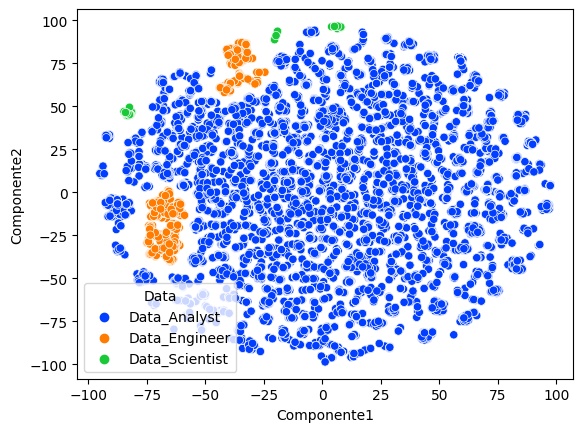

In [65]:
axes = sns.scatterplot(data = analize_reducido, x="Componente1",y="Componente2",hue="Data", palette="bright")


In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=3, random_state=11)

In [37]:
kmeans.fit(analize)

KMeans(n_clusters=3, random_state=11)

In [45]:
print(kmeans.labels_[0:400])

[0 0 1 0 1 0 2 2 1 1 0 1 0 1 1 2 2 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 0 0 1 1 1 0 0 1 2 0 0 0 1 1 0 0 1 2 0 1 0 1 0 1 1 0 1 1 1 1 2 0 1 1 1 0 0
 0 2 2 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 2 1 0 0 2 2 1 1 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 2 1 0 0 0 0 0 1 0 1 0 0 1 0 0 2 0 1 0 0 1
 1 0 0 1 2 1 1 0 0 0 1 0 1 1 1 0 2 0 1 0 0 0 0 1 0 2 0 0 0 0 0 2 1 0 1 2 1
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 2 1 1 0 2 2 0 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 2 0 0 0 1 0 0 1 1 2 1 1 1 2 0 1 0 0 0 1 0 1 1 1 2 0 0 2 1 0 1
 0 1 1 2 0 1 1 2 0 1 0 0 0 0 1 0 1 1 0 0 2 0 2 2 1 1 0 1 1 0 0 1 1 0 0 0 2
 2 0 0 1 1 1 1 1 1 1 1 0 0 0 2 2 0 0 0 0 2 0 0 0 1 0 1 1 2 2 0 0 0 0 2 1 0
 0 0 0 2 1 1 2 0 2 1 2 0 1 2 1 0 0 2 0 0 2 1 0 1 2 0 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0]


In [63]:
import matplotlib.pyplot as plt

C:\Users\lopez\AppData\Local\Temp\ipykernel_2628\775937516.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Componente1', y='Componente2', data = analize_reducido, palette="bright")


<AxesSubplot: xlabel='Componente1', ylabel='Componente2'>

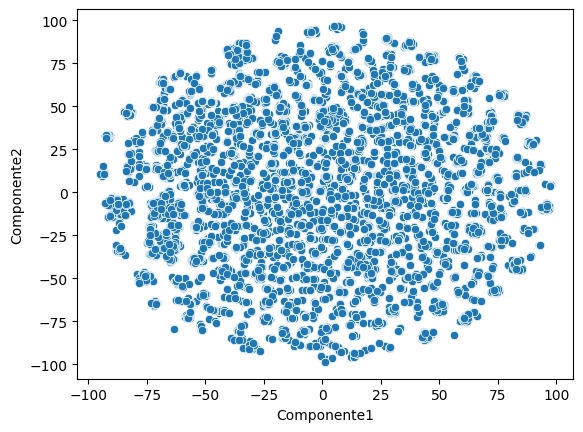

In [49]:
sns.scatterplot(x='Componente1', y='Componente2', data = analize_reducido, palette="bright")
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
